In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import mpld3
from IPython.core.display import display, HTML
import base64
import plotly

/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_15230/2054862573.py:6: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



In [3]:
df_drivers = pd.read_csv("drivers.csv")
df_fastest_laps = pd.read_csv("fastest_laps.csv")
df_winners = pd.read_csv("winners.csv")
df_teams = pd.read_csv("teams.csv")

In [4]:
# drop all Nan  values
df_drivers = df_drivers.dropna()

In [5]:
df_winners

# create a new column for the year of the Date
df_winners['Year'] = pd.DatetimeIndex(df_winners['Date']).year

# keep only rows where Year < 2020
df_winners = df_winners[df_winners['Year'] < 2020]

In [6]:


# create a new dataframe in which you group the winners by year and count the number of wins
df_winners_grouped_car = df_winners.groupby(['Year', 'Car']).size().reset_index(name='Wins')
df_winners_grouped_car = df_winners_grouped_car.sort_values(by=['Year', 'Wins'], ascending=True)

# create a new dataframe in which you group the winners by year and count the number of wins
df_winners_grouped_winner = df_winners.groupby(['Year', 'Winner', 'Car']).size().reset_index(name='Wins')
df_winners_grouped_winner = df_winners_grouped_winner.sort_values(by=['Year', 'Wins'], ascending=True)

# Berechnung der Dominanz innerhalb von 10 Jahre
- Zähle Anzahl Rennen innerhalb dieser 10 Jahre
- Zähle Anzahl Siege pro Team innerhalb dieser 10 Jahre
- Berechne Dominanz als Anzahl Siege / Anzahl Rennen

# Darstellung der Dominanz innerhalb von 10 Jahren
- Erstelle ein Barplot mit Dominanz pro Team innerhalb dieser 10 Jahre
- Auf der Y-Achse sollen die Jahre dargestellt werden
- Auf der X-Achse soll der Dominanzwert dargestellt werden

In [7]:
df_winners_grouped_car.head(10)

,Year,Car,Wins
1,1950,Kurtis Kraft Offenhauser,1
0,1950,Alfa Romeo,6
4,1951,Kurtis Kraft Offenhauser,1
3,1951,Ferrari,3
2,1951,Alfa Romeo,5
6,1952,Kuzma Offenhauser,1
5,1952,Ferrari,7
8,1953,Kurtis Kraft Offenhauser,1
9,1953,Maserati,1
7,1953,Ferrari,7


In [8]:
# Zuordnung der Teamnamen
team_mapping = {
    'Mercedes-Benz': 'Mercedes',
    'Brabham Climax': 'Brabham',
    'Brabham Ford': 'Brabham',
    'Brabham Repco': 'Brabham',
    'Brabham Alfa Romeo': 'Alfa Romeo',
    'Brabham BMW': 'Brabham',
    'McLaren Honda': 'McLaren',
    'Lotus Honda': 'Lotus',
    'Williams Honda': 'Williams',
    'Jordan Mugen Honda': 'Jordan',
    'Ligier Mugen Honda': 'Ligier',
    'Brawn Mercedes': 'Brawn',
    'Lotus BRM': 'Lotus',
    'Lotus Climax': 'Lotus',
    'Lotus Ford': 'Lotus',
    'Lotus Renault': 'Lotus',
    'McLaren Ford': 'McLaren',
    'McLaren TAG': 'McLaren',
    'McLaren Mercedes': 'Mercedes',
    'Benetton Renault': 'Renault',
    'Lotus Renault': 'Renault',
    'Williams Renault': 'Renault',
    'Alpine Renault': 'Renault',
    'Benetton BMW': 'Benetton',
    'Benetton Ford': 'Benetton',
    'RBR Renault': 'Red Bull Racing',
    'Red Bull Racing Renault': 'Red Bull Racing',
    'Red Bull Racing TAG Heuer': 'Red Bull Racing',
    'Red Bull Racing Honda': 'Red Bull Racing',
    'Red Bull Racing Honda RBPT': 'Red Bull Racing',
    'Red Bull Racing RBPT': 'Red Bull Racing',
    'Epperly Offenhauser': 'Offenhauser',
    'Kuzma Offenhauser': 'Offenhauser',
    'Watson Offenhauser': 'Offenhauser',
    'Kurtis Kraft Offenhauser': 'Offenhauser',
    'Sauber BMW': 'Sauber',
    'STR Ferrari': 'Ferrari',
    'Brawn Mercedes': 'Mercedes',
    
}

# Anwenden der Zuordnung
df_winners_grouped_car['Car'] = df_winners_grouped_car['Car'].replace(team_mapping)


In [9]:
# Dekade erstellen
df_winners_grouped_car['Decade'] = (df_winners_grouped_car['Year'] // 10) * 10

# Siege pro Dekade aggregieren
decade_wins_total = df_winners_grouped_car.groupby(['Decade', 'Car'])['Wins'].sum().reset_index()


# Anzahl Rennen pro Dekade aggregieren
decade_wins_total['Total'] = decade_wins_total.groupby(['Decade'])['Wins'].transform('sum')

# Anzahl Siege pro Dekade / Wins pro Car
decade_wins_total["Dominanz"] = decade_wins_total['Wins'] / decade_wins_total['Total']

# sortieren
decade_wins_total.sort_values(by=['Decade', 'Dominanz'], ascending=False)

# keep only the highest value per decade
decade_wins_total = decade_wins_total.loc[decade_wins_total.groupby('Decade')['Dominanz'].idxmax()]

decade_wins_total["Bar"] = 10

In [10]:
decade_wins_total

,Decade,Car,Wins,Total,Dominanz,Bar
3,1950,Ferrari,30,87,0.344828,10
15,1960,Lotus,36,100,0.360000,10
23,1970,Ferrari,37,144,0.256944,10
42,1980,McLaren,56,156,0.358974,10
53,1990,Renault,73,162,0.450617,10
55,2000,Ferrari,86,174,0.494253,10
64,2010,Mercedes,111,198,0.560606,10


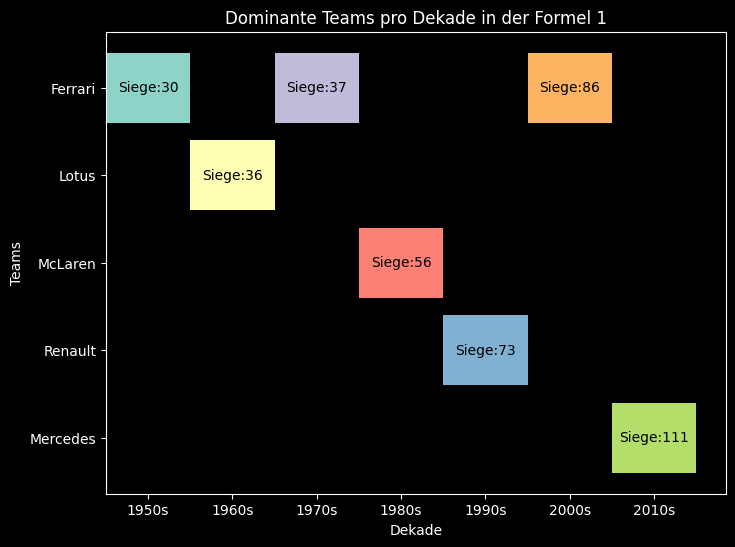

In [11]:
# Visualisierung
fig, ax = plt.subplots(figsize=(8, 6))

# Bars für jedes Team in jeder Dekade
for idx, row in decade_wins_total.iterrows():
    ax.barh(row['Car'], row['Bar'], left=row['Decade'], height=0.8)

# Achsenbeschriftungen und Titel
ax.set_xlabel('Dekade')
ax.set_ylabel('Teams')
ax.set_title('Dominante Teams pro Dekade in der Formel 1')
ax.set_xticks(decade_wins_total['Decade'] + 5)  # Position der X-Achsenbeschriftungen in der Mitte der Dekade
ax.set_xticklabels([f"{int(decade)}s" for decade in decade_wins_total['Decade']])
ax.invert_yaxis()  # Die Teams von oben nach unten anzeigen

# Anzeige der Gesamtanzahl der Siege pro Dekade als Text
for idx, row in decade_wins_total.iterrows():
    ax.text((row['Decade'] + 5), row['Car'], f"Siege:{row['Wins']}", va='center', ha='center', color='black', fontsize=10)

plt.show()

# Speichern des Diagramms als HTML-Datei
html_Dekade_teams = mpld3.fig_to_html(fig)
with open("dominante_teams_pro_dekade.html", "w") as file:
    file.write(html_Dekade_teams)

# Erstelle eine Karte mit einem Slider in welchem man die Verteilung der Rennen auf dem Globus sehen kann
- Feature Dekade erstellen
- Alle Rennen einem Land zuordnen

# Erstelle eine Karte mit einem Slider

In [12]:
df_winners

,Grand Prix,Date,Winner,Car,Laps,Time,Name Code,Year
0,Great Britain,1950-05-13,Nino Farina,Alfa Romeo,70.0,2:13:23.600,FAR,1950
1,Monaco,1950-05-21,Juan Manuel Fangio,Alfa Romeo,100.0,3:13:18.700,FAN,1950
2,Indianapolis 500,1950-05-30,Johnnie Parsons,Kurtis Kraft Offenhauser,138.0,2:46:55.970,PAR,1950
3,Switzerland,1950-06-04,Nino Farina,Alfa Romeo,42.0,2:02:53.700,FAR,1950
4,Belgium,1950-06-18,Juan Manuel Fangio,Alfa Romeo,35.0,2:47:26.000,FAN,1950
...,...,...,...,...,...,...,...,...
1016,Japan,2019-10-13,Valtteri Bottas,Mercedes,52.0,1:21:46.755,BOT,2019
1017,Mexico,2019-10-27,Lewis Hamilton,Mercedes,71.0,1:36:48.904,HAM,2019
1018,United States,2019-11-03,Valtteri Bottas,Mercedes,56.0,1:33:55.653,BOT,2019
1019,Brazil,2019-11-17,Max Verstappen,Red Bull Racing Honda,71.0,1:33:14.678,VER,2019


In [13]:
df_winners_map = df_winners.copy()

# Dekade erstellen
df_winners_map['Decade'] = (df_winners['Year'] // 10) * 10

# Mapping-Tabelle erstellen
race_to_country = {
    'Great Britain': 'United Kingdom',
    'Monaco': 'Monaco',
    'Indianapolis 500': 'United States',
    'Switzerland': 'Switzerland',
    'Belgium': 'Belgium',
    'France': 'France',
    'Italy': 'Italy',
    'Germany': 'Germany',
    'Spain': 'Spain',
    'Netherlands': 'Netherlands',
    'Argentina': 'Argentina',
    'Pescara': 'Italy',
    'Portugal': 'Portugal',
    'Morocco': 'Morocco',
    'United States': 'United States',
    'South Africa': 'South Africa',
    'Mexico': 'Mexico',
    'Austria': 'Austria',
    'Canada': 'Canada',
    'Brazil': 'Brazil',
    'Sweden': 'Sweden',
    'USA West': 'United States',
    'USA East': 'United States',
    'Japan': 'Japan',
    'San Marino': 'Italy',
    "Caesar's Palace": 'United States',
    'Detroit': 'United States',
    'Europe': 'Varies',
    'Dallas': 'United States',
    'Australia': 'Australia',
    'Hungary': 'Hungary',
    'Pacific': 'Japan',
    'Luxembourg': 'Luxembourg',
    'Malaysia': 'Malaysia',
    'Bahrain': 'Bahrain',
    'China': 'China',
    'Turkey': 'Turkey',
    'Singapore': 'Singapore',
    'Abu Dhabi': 'United Arab Emirates',
    'South Korea': 'South Korea',
    'India': 'India',
    'Russia': 'Russia',
    'Azerbaijan': 'Azerbaijan',
    'Styria': 'Austria',
    '70th Anniversary': 'United Kingdom',
    'Tuscany': 'Italy',
    'Eifel': 'Germany',
    'Emilia Romagna': 'Italy',
    'Sakhir': 'Bahrain',
    'Qatar': 'Qatar',
    'Saudi Arabia': 'Saudi Arabia',
    'Miami': 'United States',
    'Las Vegas': 'United States'
}

df_winners_map['Country'] = df_winners_map['Grand Prix'].map(race_to_country)

df_winners_map_grouped = df_winners_map.groupby(['Decade', 'Country'])["Winner"].count().reset_index()

In [14]:
# Koordinaten für die Länder
country_coords = {
    'United Kingdom': {'Latitude': 55.3781, 'Longitude': -3.4360},
    'Monaco': {'Latitude': 43.7384, 'Longitude': 7.4246},
    'United States': {'Latitude': 37.0902, 'Longitude': -95.7129},
    'Switzerland': {'Latitude': 46.8182, 'Longitude': 8.2275},
    'Belgium': {'Latitude': 50.5039, 'Longitude': 4.4699},
    'France': {'Latitude': 46.6034, 'Longitude': 1.8883},
    'Italy': {'Latitude': 41.8719, 'Longitude': 12.5674},
    'Germany': {'Latitude': 51.1657, 'Longitude': 10.4515},
    'Spain': {'Latitude': 40.4637, 'Longitude': -3.7492},
    'Netherlands': {'Latitude': 52.1326, 'Longitude': 5.2913},
    'Argentina': {'Latitude': -38.4161, 'Longitude': -63.6167},
    'Portugal': {'Latitude': 39.3999, 'Longitude': -8.2245},
    'Morocco': {'Latitude': 31.7917, 'Longitude': -7.0926},
    'South Africa': {'Latitude': -30.5595, 'Longitude': 22.9375},
    'Mexico': {'Latitude': 23.6345, 'Longitude': -102.5528},
    'Austria': {'Latitude': 47.5162, 'Longitude': 14.5501},
    'Canada': {'Latitude': 56.1304, 'Longitude': -106.3468},
    'Brazil': {'Latitude': -14.2350, 'Longitude': -51.9253},
    'Sweden': {'Latitude': 60.1282, 'Longitude': 18.6435},
    'Japan': {'Latitude': 36.2048, 'Longitude': 138.2529},
    'Luxembourg': {'Latitude': 49.8153, 'Longitude': 6.1296},
    'Malaysia': {'Latitude': 4.2105, 'Longitude': 101.9758},
    'Bahrain': {'Latitude': 26.0667, 'Longitude': 50.5577},
    'China': {'Latitude': 35.8617, 'Longitude': 104.1954},
    'Turkey': {'Latitude': 38.9637, 'Longitude': 35.2433},
    'Singapore': {'Latitude': 1.3521, 'Longitude': 103.8198},
    'United Arab Emirates': {'Latitude': 23.4241, 'Longitude': 53.8478},
    'South Korea': {'Latitude': 35.9078, 'Longitude': 127.7669},
    'India': {'Latitude': 20.5937, 'Longitude': 78.9629},
    'Russia': {'Latitude': 61.5240, 'Longitude': 105.3188},
    'Azerbaijan': {'Latitude': 40.1431, 'Longitude': 47.5769},
    'Qatar': {'Latitude': 25.3548, 'Longitude': 51.1839},
    'Saudi Arabia': {'Latitude': 23.8859, 'Longitude': 45.0792},
    'Australia': {'Latitude': -25.2744, 'Longitude': 133.7751},
    'Hungary': {'Latitude': 47.1625, 'Longitude': 19.5033},
    'Varies': {'Latitude': 0, 'Longitude': 0}
}

# Koordinaten hinzufügen
df_winners_map_grouped['Latitude'] = df_winners_map_grouped['Country'].map(lambda x: country_coords[x]['Latitude'])
df_winners_map_grouped['Longitude'] = df_winners_map_grouped['Country'].map(lambda x: country_coords[x]['Longitude'])

# rename Winner to Races
df_winners_map_grouped = df_winners_map_grouped.rename(columns={'Winner':'Races'})

In [15]:
# Funktion zum Erstellen der Karte für eine gegebene Dekade
def create_map(decade):
    filtered_df = df_winners_map_grouped[df_winners_map_grouped['Decade'] == decade]
    fig = px.scatter_mapbox(filtered_df, lat="Latitude", lon="Longitude", hover_name="Country", size="Races",
                            color="Races", color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=1, hover_data={'Races':True, 'Latitude':False, 'Longitude':False}, title="Verteilung der Rennen auf der Erde pro Dekade")
    
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0}, coloraxis_colorbar=dict(title="Races"))
    return fig

# Erstellen der initialen Daten für jede Dekade
maps = {decade: create_map(decade) for decade in df_winners_map_grouped['Decade'].unique()}

# Erstellen des initialen Diagramms
initial_decade = 1950
fig = maps[initial_decade]

# Slider hinzufügen
steps = []
for decade in sorted(df_winners_map_grouped['Decade'].unique()):
    step = dict(
        method="animate",
        args=[[decade], dict(mode="immediate", frame=dict(duration=300, redraw=True), transition=dict(duration=0))],
        label=str(decade),
    )
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Decade: "},
    pad={"t": 50},
    steps=steps,
    
    x=0.04,  # Positionierung nach rechts verschieben
    y=-0.1  # Positionierung nach oben verschieben
)]

# Frames erstellen
frames = [go.Frame(data=maps[decade].data, name=str(decade)) for decade in df_winners_map_grouped['Decade'].unique()]

fig.update(frames=frames)
fig.update_layout(
    sliders=sliders,
    height=800,  # Höhe des Diagramms erhöhen
    width=1200,    # Breite des Diagramms reduzieren
    dragmode=False,  # Scrollen deaktivieren
    title_x=0.5,
    title_y=0.95,
    margin={"t": 100, "b": 200}  # Platz hinzufügen oben und unten
)

# Save the Plotly plot as an HTML file
plotly_file_path = 'plotly_races_per_decade.html'
plotly.offline.plot(fig, filename=plotly_file_path, auto_open=False)

# Anzeige
fig.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:1988: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:1988: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:1988: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-pa

In [18]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline
import time

# Function to create the map for a given decade
def create_map(decade):
    filtered_df = df_winners_map_grouped[df_winners_map_grouped['Decade'] == decade]
    fig = px.scatter_mapbox(filtered_df, lat="Latitude", lon="Longitude", hover_name="Country", size="Races",
                            color="Races", color_continuous_scale=px.colors.cyclical.IceFire, size_max=15, zoom=1,
                            hover_data={'Races': True, 'Latitude': False, 'Longitude': False},
                            title="Verteilung der Rennen auf der Erde pro Dekade")
    
    fig.update_layout(mapbox_style="open-street-map")
    fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0}, coloraxis_colorbar=dict(title="Races"))
    return fig

# Create the initial data for each decade
maps = {decade: create_map(decade) for decade in df_winners_map_grouped['Decade'].unique()}

# Create the initial plot
initial_decade = 1950
fig = maps[initial_decade]

# Add slider
steps = []
for decade in sorted(df_winners_map_grouped['Decade'].unique()):
    step = dict(
        method="animate",
        args=[[str(decade)], dict(mode="immediate", frame=dict(duration=3000, redraw=True), transition=dict(duration=0))],
        label=str(decade),
    )
    steps.append(step)

sliders = [dict(
    active=0,
    currentvalue={"prefix": "Decade: "},
    pad={"t": 50},
    steps=steps,
    x=0.04,  # Position to the right
    y=-0.1  # Position upwards
)]

# Create frames
frames = [go.Frame(data=maps[decade].data, name=str(decade)) for decade in df_winners_map_grouped['Decade'].unique()]

fig.update(frames=frames)
fig.update_layout(
    sliders=sliders,
    height=800,
    width=1200,
    dragmode=False,
    title_x=0.5,
    title_y=0.95,
    margin={"t": 100, "b": 200},
    updatemenus=[dict(
        type="buttons",
        showactive=False,
        buttons=[dict(label="",
                        method="animate",
                        args=[None, dict(frame=dict(duration=3000, redraw=True), 
                                        fromcurrent=True, mode='immediate', transition=dict(duration=0))])]
    )]
)


# Save the Plotly plot as an HTML file
plotly_file_path = 'plotly_races_per_decade.html'
plotly.offline.plot(fig, filename=plotly_file_path, auto_open=False)

# Display
fig.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:1988: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:1988: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotly/express/_core.py:1988: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-pa

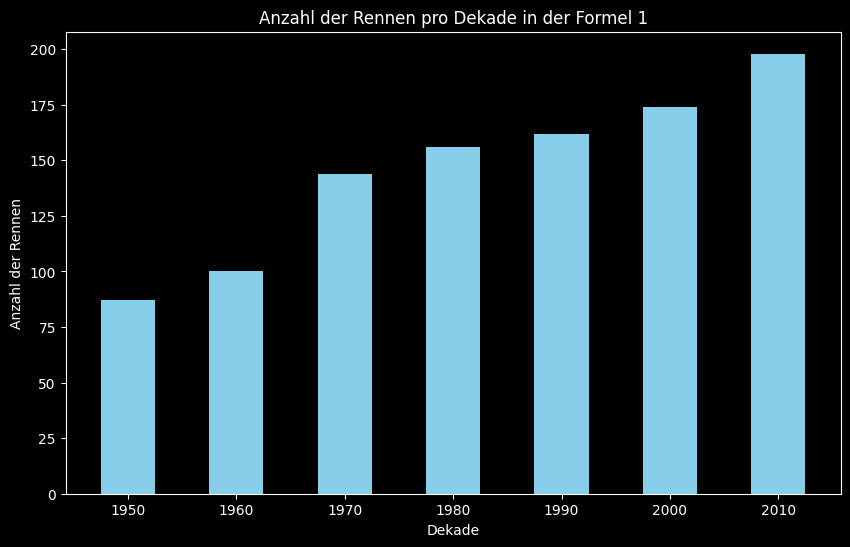

In [361]:
df_winners_grouped_races = df_winners_map_grouped.groupby('Decade')["Races"].sum().reset_index()

# create a barchart with the decade on the x-axis and the number of Races on the y-axis
# use matplotlib to create the plot
# Erstellen des Balkendiagramms
fig, ax = plt.subplots(figsize=(10, 6))

ax.bar(df_winners_grouped_races['Decade'], df_winners_grouped_races['Races'], color='skyblue', width=5)

# Achsenbeschriftungen und Titel
ax.set_xlabel('Dekade')
ax.set_ylabel('Anzahl der Rennen')
ax.set_title('Anzahl der Rennen pro Dekade in der Formel 1')


# Speichern des Diagramms als HTML-Datei
html_anzahl_rennen = mpld3.fig_to_html(fig)
with open("anzahl_rennen_pro_dekade.html", "w") as file:
    file.write(html_anzahl_rennen)

# Anzeige des Diagramms
plt.show()

In [362]:
# Count the amount of wins per Year and add this value to a new column called, Total_wins_per_year
df_winners_grouped_car['Total_wins_per_year'] = df_winners_grouped_car.groupby('Year')['Wins'].transform('sum')

# create a new column called Dominance in which you divide the amount of wins by the total amount of wins per year
df_winners_grouped_car['Dominance'] = df_winners_grouped_car['Wins'] / df_winners_grouped_car['Total_wins_per_year']

# Technischer Fortschritt in der Formel 1
- Beispielhafte Rennstrecken welche eine lange Historie haben
- Wie hat sich die Rundenzeit auf diesen Strecken über die Jahre entwickelt

# Visualisiere die Entwicklung der Rundenzeit auf den Rennstrecken

In [363]:
df_winners_lap_time = df_winners.copy()

# Dekade erstellen
df_winners_lap_time['Decade'] = (df_winners_lap_time['Year'] // 10) * 10

In [364]:
df_winners_lap_time

,Grand Prix,Date,Winner,Car,Laps,Time,Name Code,Year,Decade
0,Great Britain,1950-05-13,Nino Farina,Alfa Romeo,70.0,2:13:23.600,FAR,1950,1950
1,Monaco,1950-05-21,Juan Manuel Fangio,Alfa Romeo,100.0,3:13:18.700,FAN,1950,1950
2,Indianapolis 500,1950-05-30,Johnnie Parsons,Kurtis Kraft Offenhauser,138.0,2:46:55.970,PAR,1950,1950
3,Switzerland,1950-06-04,Nino Farina,Alfa Romeo,42.0,2:02:53.700,FAR,1950,1950
4,Belgium,1950-06-18,Juan Manuel Fangio,Alfa Romeo,35.0,2:47:26.000,FAN,1950,1950
...,...,...,...,...,...,...,...,...,...
1016,Japan,2019-10-13,Valtteri Bottas,Mercedes,52.0,1:21:46.755,BOT,2019,2010
1017,Mexico,2019-10-27,Lewis Hamilton,Mercedes,71.0,1:36:48.904,HAM,2019,2010
1018,United States,2019-11-03,Valtteri Bottas,Mercedes,56.0,1:33:55.653,BOT,2019,2010
1019,Brazil,2019-11-17,Max Verstappen,Red Bull Racing Honda,71.0,1:33:14.678,VER,2019,2010


In [379]:
# check which Grand Prix do exist in each Decade
grand_prix_per_decade = df_winners_lap_time.groupby('Decade')['Grand Prix'].unique().reset_index()

# Finden der Grand Prix, die in allen Jahrzehnten vorhanden sind
common_grand_prix = set(grand_prix_per_decade.iloc[0]['Grand Prix'])
for grand_prix_list in grand_prix_per_decade['Grand Prix']:
    common_grand_prix.intersection_update(grand_prix_list)

common_grand_prix_list = list(common_grand_prix)

['Germany',
 'Belgium',
 'Great Britain',
 'Italy',
 'Monaco',
 'United States',
 'Spain',
 'France']

In [389]:
filtered_df = df_winners_lap_time[df_winners_lap_time['Grand Prix'].isin(common_grand_prix_list)]

# Get the maximum laps per Grand Prix per Decade for the selected Grand Prix
max_laps_per_gp_decade_filtered = filtered_df.loc[filtered_df.groupby(['Decade', 'Grand Prix'])['Laps'].idxmax()]

In [390]:
max_laps_per_gp_decade_filtered.head()

,Grand Prix,Date,Winner,Car,Laps,Time,Name Code,Year,Decade
9,Belgium,1951-06-17,Nino Farina,Alfa Romeo,36.0,2:45:46.200,FAR,1951,1950
10,France,1951-07-01,Juan Manuel Fangio,Alfa Romeo,77.0,3:22:11.000,FAN,1951,1950
83,Germany,1959-08-02,Tony Brooks,Ferrari,60.0,2:09:31.600,BRO,1959,1950
55,Great Britain,1956-07-14,Juan Manuel Fangio,Ferrari,101.0,2:59:47.000,FAN,1956,1950
66,Italy,1957-09-08,Stirling Moss,Vanwall,87.0,2:35:03.900,MOS,1957,1950


/var/folders/f0/pqy2clvx0nv38xm_npv8fklm0000gn/T/ipykernel_5798/3560112822.py:12: UserWarning:

FixedFormatter should only be used together with FixedLocator



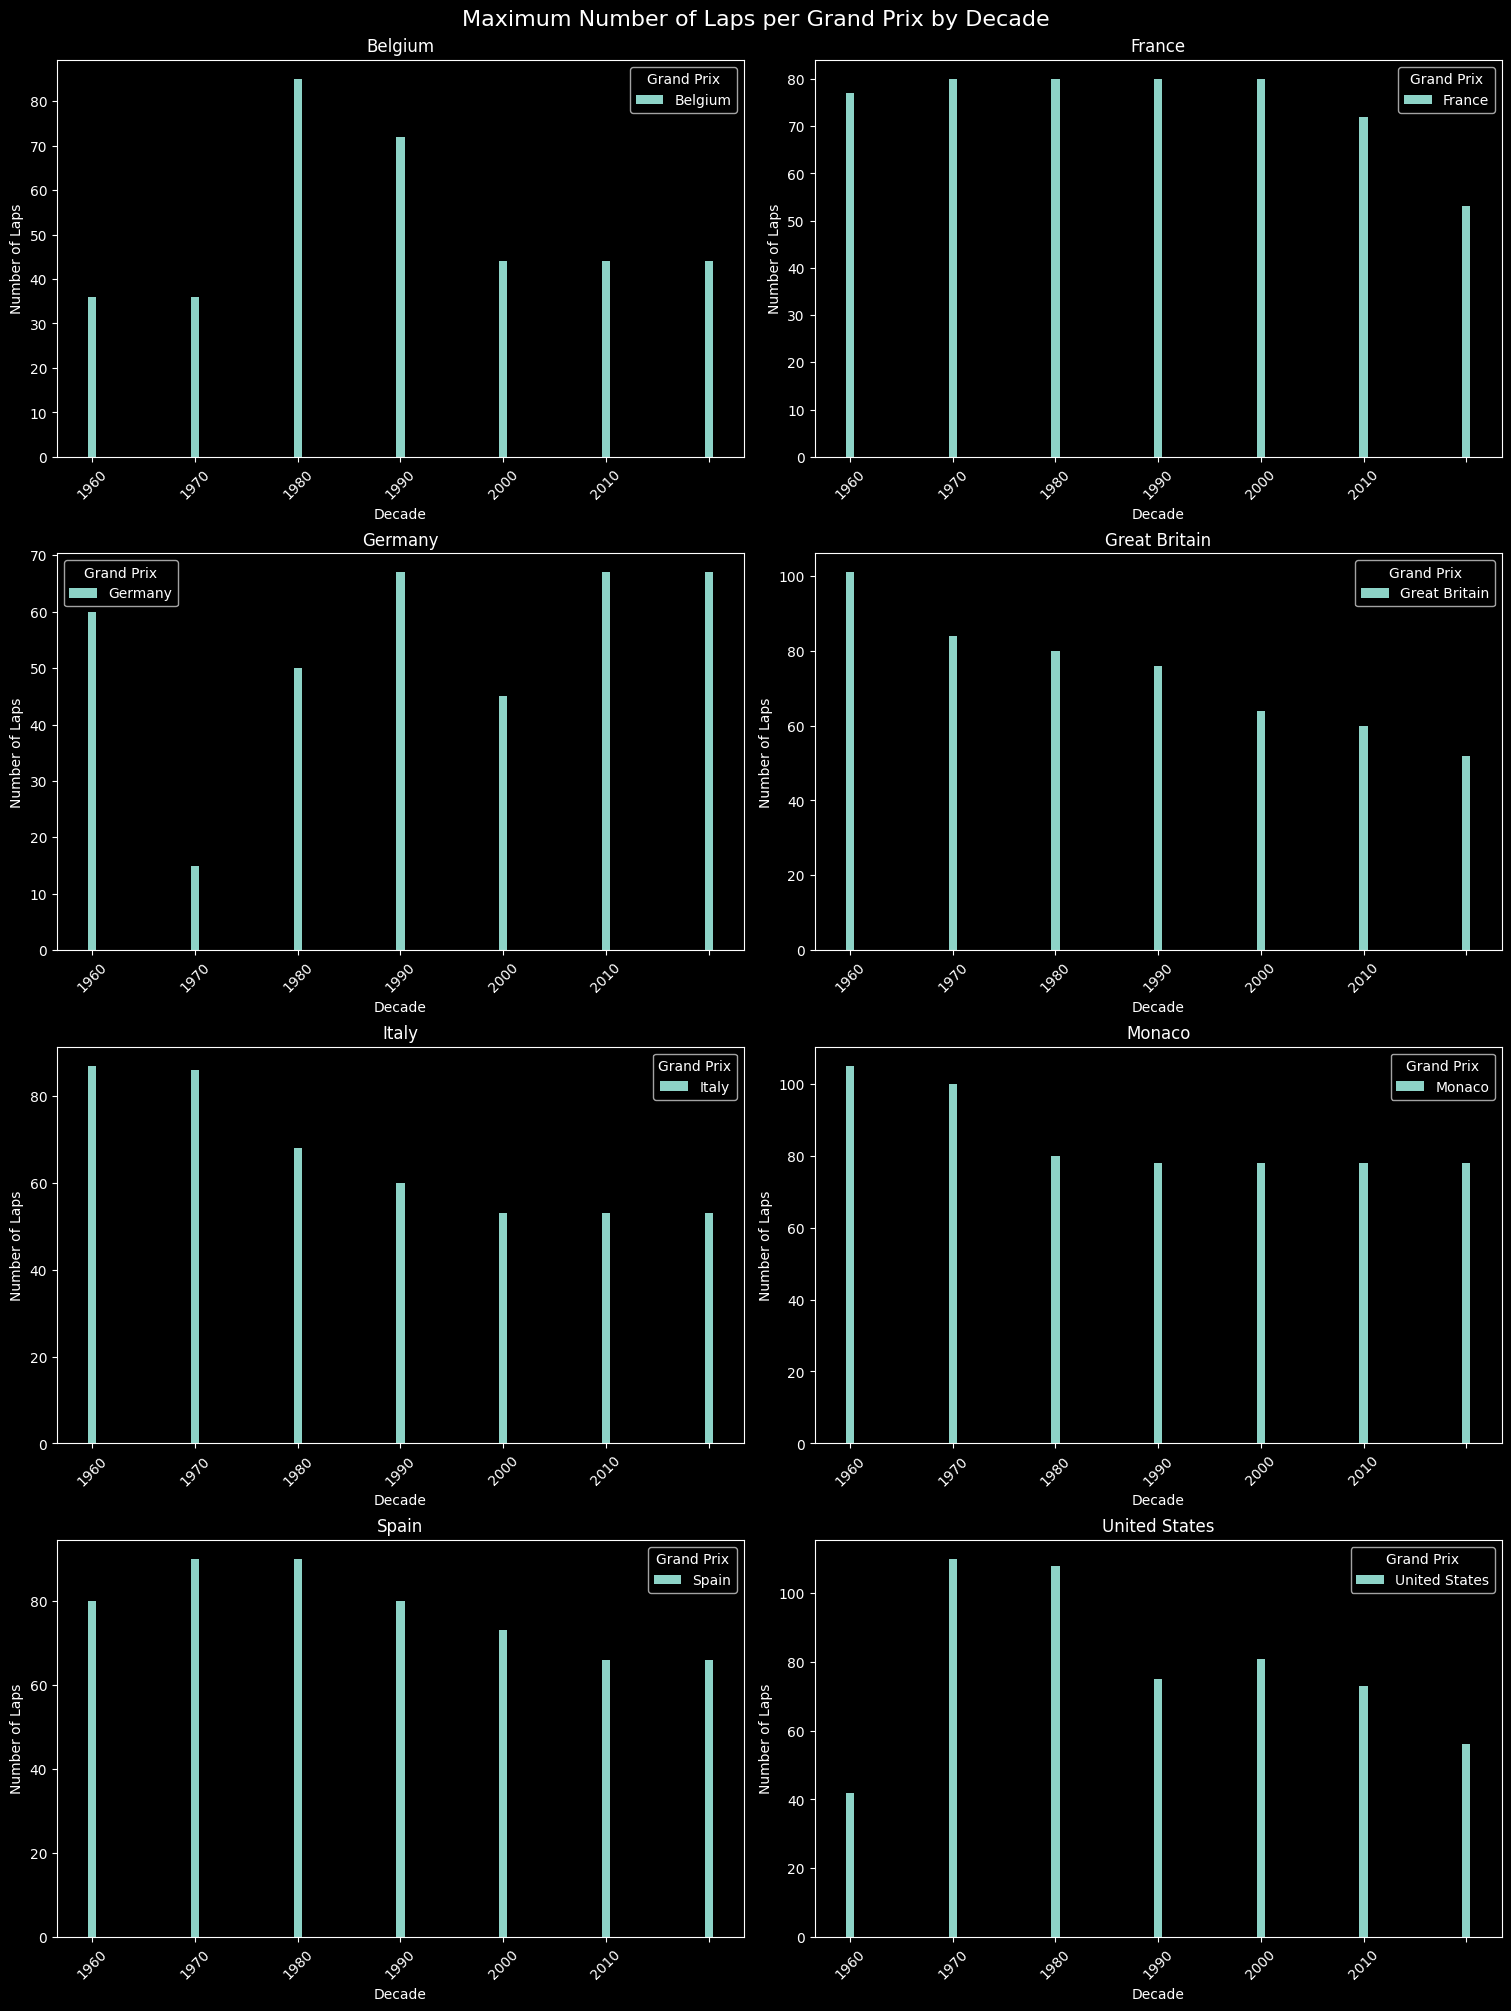

In [392]:
# Plot the barchart with subplots for each Grand Prix
unique_grand_prix = max_laps_per_gp_decade_filtered['Grand Prix'].unique()
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20), constrained_layout=True)

for ax, grand_prix in zip(axes.flatten(), unique_grand_prix):
    gp_data = max_laps_per_gp_decade_filtered[max_laps_per_gp_decade_filtered['Grand Prix'] == grand_prix]
    ax.bar(gp_data['Decade'], gp_data['Laps'], label=grand_prix)
    ax.set_title(grand_prix)
    ax.set_xlabel('Decade')
    ax.set_ylabel('Number of Laps')
    ax.legend(title='Grand Prix')
    ax.set_xticklabels(gp_data['Decade'], rotation=45)

plt.suptitle('Maximum Number of Laps per Grand Prix by Decade', fontsize=16)
plt.show()

# Visualisierung Budget Entwicklung

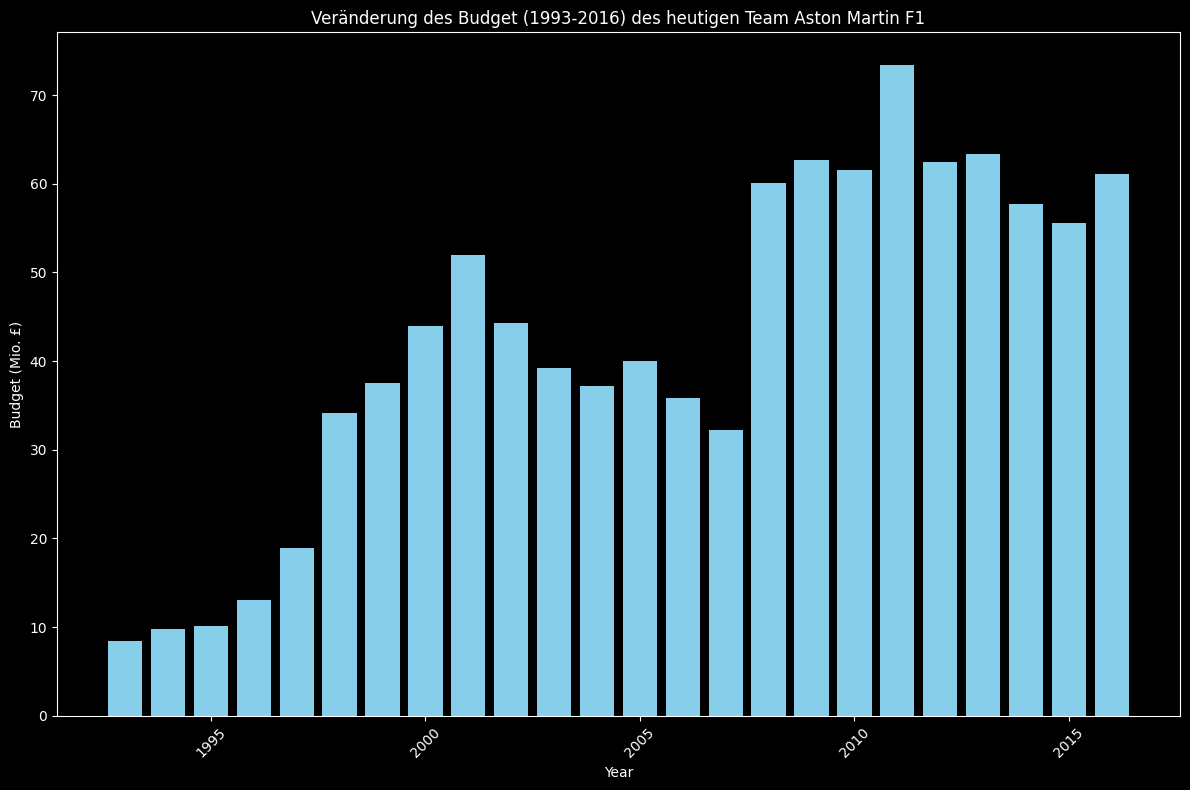

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Fehler in der Team-Liste korrigieren und sicherstellen, dass alle Listen die gleiche Länge haben
teams = ["Jordan"] * 13 + ["Midland"] + ["Spyker"] + ["Force India"] * 7

# Füge die fehlenden Einträge in der Team-Liste hinzu
teams.extend(["Force India"] * (24 - len(teams)))

data = {
    "Jahr": [1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
    "Budget (Mio. £)": [8.4, 9.8, 10.1, 13.1, 18.9, 34.1, 37.5, 44.0, 52.0, 44.3, 39.2, 37.2, 40.0, 35.8, 32.2, 60.1, 62.7, 61.5, 73.4, 62.4, 63.4, 57.7, 55.6, 61.1],
    "WM-Position": [10, 5, 6, 5, 5, 4, 3, 6, 5, 6, 9, 9, 9, 10, 10, 10, 9, 7, 6, 7, 6, 6, 5, 4],
    "Team": teams
}

df = pd.DataFrame(data)

# Plot erstellen
plt.figure(figsize=(12, 8))
plt.bar(df["Jahr"], df["Budget (Mio. £)"], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Budget (Mio. £)')
plt.title('Veränderung des Budget (1993-2016) des heutigen Team Aston Martin F1')
plt.xticks(rotation=45)
plt.tight_layout()

# Speichern des Diagramms als png
plt.savefig('f1_team_budgets.png')

<style>
        body {{ font-family: Arial, sans-serif; line-height: 1.6; margin: 0; padding: 0; }}
        .container {{ width: 80%; margin: auto; overflow: hidden; }}
        header {{ background: #333; color: #fff; padding-top: 30px; min-height: 70px; border-bottom: #0779e4 3px solid; }}
        header a {{ color: #fff; text-decoration: none; text-transform: uppercase; font-size: 16px; }}
        header ul {{ padding: 0; list-style: none; }}
        header li {{ float: left; display: inline; padding: 0 20px 0 20px; }}
        header #branding {{ float: left; }}
        header #branding h1 {{ margin: 0; }}
        header nav {{ float: right; margin-top: 10px; }}
        .showcase {{ min-height: 400px; background: url('showcase.jpg') no-repeat 0 -400px; text-align: center; color: #fff; }}
        .showcase h1 {{ margin-top: 100px; font-size: 55px; margin-bottom: 10px; }}
        .showcase p {{ font-size: 20px; }}
        .content {{ padding: 20px; }}
        .content h2 {{ color: #333; }}
        .content img {{ display: block; margin: auto; width: 100%; max-width: 800px; }}
        footer {{ background: #333; color: #fff; text-align: center; padding: 20px 0; }}
        footer ul {{ list-style-type: none; padding: 0; }}
        footer li {{ margin: 5px 0; }}
        footer a {{ color: #fff; text-decoration: none; }}
    </style>

In [26]:
"""# Read the Plotly HTML file content
plotly_file_path_map = 'plotly_races_per_decade.html'
with open(plotly_file_path_map, 'r', encoding='utf-8') as file:
    world_map = file.read()

plotly_file_path_death = 'f1_driver_deaths_per_year.html'
with open(plotly_file_path_death, 'r', encoding='utf-8') as file:
    bar_security = file.read()

# Wenn 'frames' nicht definiert ist, definieren Sie es als leeres Array
frames = []"""

# HTML Dokument erstellen
html_content = f"""
<!DOCTYPE html>
<html lang="de">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Die Evolution der Formel 1: Triumph und Technologie</title>
    
    <style>
        body {{ 
            font-family: Arial, sans-serif; 
            line-height: 1.6; 
            margin: 0; 
            padding: 0; 
        }}
        .container {{
            width: 80%; 
            margin: auto; 
            overflow: hidden; 
            position: relative; 
            z-index: 2;
        }}
        .topic-section {{
            padding: 50px 20px; 
            color: white;
            background-size: cover;
            background-position: center;
        }}
        .early-years {{
            background-image: url('early_years.jpg'); /* Replace with the path to your image */
        }}
        .global-expansion {{
            background-image: url('global_expansion.jpg'); /* Replace with the path to your image */
        }}
        .dominant-teams {{
            background-image: url('dominant_teams.jpg'); /* Replace with the path to your image */
        }}
        .section-wrapper {{
            position: relative;
            min-height: 400px;
            overflow: hidden;
        }}
        footer {{ 
            background: #333; 
            color: #fff; 
            text-align: center; 
            padding: 20px 0; 
        }}
        footer ul {{ 
            list-style-type: none; 
            padding: 0; 
        }}
        footer li {{ 
            margin: 5px 0; 
        }}
        footer a {{ 
            color: #fff; 
            text-decoration: none; 
        }}
    </style>
    <script src="https://cdn.plot.ly/plotly-latest.min.js"></script>
    <script>
        document.addEventListener('DOMContentLoaded', function() {{
            var plotlyDiv = document.getElementById('plotly-div');
            var frames = [];
            function animatePlot() {{
                Plotly.animate(plotlyDiv, frames.map(f => f.name), {{
                    transition: {{duration: 500}},
                    frame: {{duration: 2000, redraw: true}},
                    mode: 'immediate'
                }});
            }}
            plotlyDiv.on('plotly_animated', animatePlot);
            plotlyDiv.on('plotly_sliderchange', function(e){{
                console.log(e.step.label);
            }});
            animatePlot();
        }});
    </script>
</head>
<body>
    <header>
        <div class="container">
            <div id="branding">
                <h1>Die Evolution der Formel 1 – Von den 1950er Jahren bis heute</h1>
            </div>
        </div>
    </header>
    <div class="container">
        <h2>Wie alles begann</h2>
        <p>Die Formel 1 ist seit ihrer Gründung im Jahr 1950 eine der aufregendsten und prestigeträchtigsten Motorsportarten der Welt. Sie vereint unglaubliche Geschwindigkeiten, technische Präzision und den unermüdlichen Kampfgeist der besten Fahrer. Jedes Rennen bietet Nervenkitzel und Spannung, wenn die besten Teams und Fahrer der Welt um die Spitze kämpfen. Dramatische Situationen, von atemberaubenden Überholmanövern bis hin zu haarsträubenden Unfällen, sind an der Tagesordnung und halten die Fans in Atem. Diese Mischung aus Geschwindigkeit, Risiko und technologischer Exzellenz macht die Formel 1 zu einem unvergleichlichen Spektakel.</p>

        
        <h3>Die frühen Jahre: Ein aufregender, aber unsicherer Sport</h3>
        <p>In den Anfangsjahren der Formel 1 war die Spannung auf der Strecke unübertroffen, doch die Sicherheitsstandards ließen zu wünschen übrig. Die Fahrzeuge waren rudimentär und die Sicherheitsausrüstung beschränkte sich auf einfache Helme und Gurtzeuge. Rennstrecken hatten kaum Barrieren, was zu zahlreichen tödlichen Unfällen führte. Diese gefährlichen Bedingungen verdeutlichten die dringende Notwendigkeit für verbesserte Sicherheitsmaßnahmen.</p>
        <div style="text-align: left;">
        <iframe src="f1_driver_deaths_per_year.html" width="1300" height="600"></iframe>
        </div>
        <p>Wie in der Grafik "Anzahl Todesfälle von F1-Fahrer pro Jahr" ersichtlich ist, gab es in den 1950er und 1960er Jahren eine erhebliche Anzahl an Todesfällen. Wichtige Sicherheitsmaßnahmen wie die Einführung von Helmen (1952) und feuerfesten Rennoveralls (1975) wurden als Reaktion auf diese Unfälle eingeführt.</p>
        <h3>1950er Jahre: Erste Sicherheitsmaßnahmen</h3>
        <p>In den 1950er Jahren begann die Formel 1, erste Schritte zur Verbesserung der Sicherheit zu unternehmen. 1952 wurde das Tragen von Helmen zur Pflicht. Diese Maßnahme wurde als Reaktion auf die zahlreichen Kopfverletzungen eingeführt, die Fahrer bei Unfällen erlitten. 1959 wurden Überrollbügel vorgeschrieben, um die Fahrer bei Überschlägen zu schützen. Trotz dieser Maßnahmen blieb die Formel 1 ein gefährlicher Sport, bei dem viele Fahrer ihr Leben verloren.</p>
        <h3>1960er und 1970er Jahre: Weiterführende Sicherheitsreformen</h3>
        <p>Die 1960er Jahre sahen weitere Fortschritte in der Sicherheit, als sicherere Cockpits und feuerfeste Anzüge eingeführt wurden. Die Einführung feuerfester Anzüge im Jahr 1975 war eine direkte Reaktion auf mehrere Vorfälle, bei denen Fahrer bei Unfällen schwere Verbrennungen erlitten. Diese Maßnahmen waren entscheidend, um das Risiko schwerer Verletzungen und Todesfälle zu verringern.</p>
        <h3>1980er Jahre: Technologische Innovationen und Sicherheitsstandards</h3>
        <p>In den 1980er Jahren revolutionierte die Einführung des Kohlefaser-Monocoques die Sicherheitsstandards in der Formel 1. Dieses Material ist extrem stark und leicht, was dazu beiträgt, die Aufprallkräfte bei Unfällen zu absorbieren und die Überlebenschancen der Fahrer zu verbessern. Diese Entwicklung war eine Reaktion auf die hohen Geschwindigkeiten und die intensiveren Wettbewerbe, die höhere Sicherheitsanforderungen erforderten. Zudem wurden Crashtests für Formel-1-Fahrzeuge eingeführt, um sicherzustellen, dass die Autos den enormen Aufprallkräften standhalten können.</p>
        <h3>1990er Jahre: Ein Jahrzehnt der Sicherheitsrevolution</h3>
        <p>Ein Wendepunkt in der Sicherheitsgeschichte der Formel 1 war der tragische Tod von Ayrton Senna und Roland Ratzenberger während des Grand Prix von San Marino 1994. Diese Tragödien führten zur Einführung des HANS-Systems (Head and Neck Support), das Kopf- und Nackenverletzungen verhindern soll. Die FIA führte umfassende Änderungen an den Strecken und Fahrzeugen durch, um die Sicherheit weiter zu erhöhen. Dies umfasste unter anderem höhere Cockpitwände, bessere Crash-Strukturen und strengere Crashtest-Anforderungen.</p>
        <h3>2000er Jahre: Weiterentwicklung der Sicherheitsstandards und technologische Innovationen</h3>
        <p>In den 2000er Jahren wurden die Sicherheitsmaßnahmen weiter verfeinert. Das HANS-System wurde 2003 verpflichtend, und die Helme der Fahrer wurden weiter verbessert. Strenge Vorschriften für die Konstruktion der Autos, darunter die Verwendung von hochfesten Materialien wie Kohlefaser und Kevlar, trugen dazu bei, das Verletzungsrisiko zu minimieren. Die Einführung des Halo-Systems im Jahr 2018, einem Titanrahmen über dem Cockpit, war ein weiterer bedeutender Schritt zur Erhöhung der Sicherheit.</p>
        <h3>2010er Jahre: Dominanz von Mercedes und die Rolle der Budgets</h3>
        <p>In den 2010er Jahren begann Mercedes, die Formel 1 zu dominieren. Diese Dominanz war nicht nur auf technologische Überlegenheit zurückzuführen, sondern auch auf die enormen finanziellen Ressourcen des Teams. Dank ihrer finanziellen Stärke konnte Mercedes kontinuierlich in neue Technologien und Entwicklungen investieren, was ihnen einen klaren Wettbewerbsvorteil verschaffte.</p>
        <p>Die Einführung der Budgetobergrenze im Jahr 2021 in der Formel 1 war ein notwendiger Schritt, um der Eskalation der Teambudgets entgegenzuwirken. In den letzten Jahrzehnten stiegen die Budgets erheblich an, was zur Dominanz von Teams wie Mercedes, Ferrari und Red Bull führte. Diese drei Teams konnten aufgrund ihrer enormen finanziellen Ressourcen kontinuierlich in neue Technologien und Entwicklungen investieren, was ihnen einen Wettbewerbsvorteil verschaffte.</p>
        <p>Kleinere Teams, die nicht über ähnliche finanzielle Mittel verfügten, hatten Schwierigkeiten, mit den Top-Teams mitzuhalten. Dies führte zu einer wachsenden Kluft zwischen den reichen und den weniger gut ausgestatteten Teams. Selbst Teams mit effizienten Betriebsmodellen, wie Force India, konnten trotz guter Leistung und cleverem Management nicht mit der finanziellen Schlagkraft der großen Teams konkurrieren.</p>
        <p>Die Einführung der Budgetobergrenze zielt darauf ab, die Kosten zu kontrollieren und den Wettbewerb in der Formel 1 zu verbessern. Es soll dafür sorgen, dass finanzielle Ressourcen nicht der einzige entscheidende Faktor für den Erfolg eines Teams sind, sondern dass auch technisches Können und strategisches Geschick eine größere Rolle spielen können.</p>
        <p>Diese Maßnahme soll langfristig zu einem ausgeglicheneren und spannenderen Wettkampf führen, bei dem mehr Teams die Chance haben, um Siege und Titel zu kämpfen, was letztlich sowohl den Sport als auch die Fans profitieren lässt.</p>
        <div style="text-align: center;">
            <img src="f1_team_budgets.png" alt="Entwicklung der Teambudgets in der Formel 1">
        </div>
        <p>Die Grafik zeigt die Veränderung der Budgets des Teams Jordan (später Midland, Spyker und Force India) in der Formel 1 von 1993 bis 2016. Der Chart verdeutlicht einen signifikanten Anstieg der Budgets über die Jahre hinweg.</p>

        <h2>Kommerzialisierung und globale Expansion der Formel 1</h2>
        <p>Parallel zu den finanziellen Entwicklungen hat sich die Formel 1 weltweit ausgebreitet. Anfangs war die Mehrheit der Rennen auf Europa beschränkt, doch mit zunehmender Popularität begannen die Rennen auch andere Kontinente zu erreichen. Heute finden Formel-1-Rennen auf der ganzen Welt statt, was die globale Beliebtheit und den Einfluss dieses Sports unterstreicht.</p>
        
        <p>Ein markantes Beispiel für diese Entwicklung ist die Expansion der Formel 1 in die USA, die in den letzten Jahren intensiv vorangetrieben wurde. Mit neuen Rennen wie dem Großen Preis von Miami und dem Großen Preis von Las Vegas wird deutlich, wie wichtig der nordamerikanische Markt für die Formel 1 geworden ist. Diese Globalisierung steht in direktem Zusammenhang mit den finanziellen Entwicklungen innerhalb des Sports.</p>
    
        <p>Die folgende Grafik zeigt die Anzahl der Rennen pro Dekade und illustriert den Anstieg der Rennanzahl, was auf die steigende Popularität und globale Expansion der Formel 1 hinweist:</p>
        
        <div style="text-align: left;">
        <iframe src="plotly_races_per_decade.html" width="1300" height="850"></iframe>
        </div>
        
        <p>Die Verteilung der Rennen auf verschiedenen Kontinenten zeigt, dass die Formel 1 eine internationale Sportart geworden ist. Rennstrecken in Nordamerika, Südamerika, Asien, Australien und dem Nahen Osten ergänzen die traditionellen europäischen Rennen und bieten Fans weltweit die Möglichkeit, die Rennen live zu verfolgen. Diese globale Präsenz hat nicht nur dazu beigetragen, die Fanbasis zu erweitern, sondern auch die wirtschaftlichen Möglichkeiten für den Sport zu vergrößern.</p>

        <h2>Dominante Teams: Triumph und Technologie</h2>
        <p>Ein weiteres faszinierendes Kapitel in der Geschichte der Formel 1 ist die Dominanz bestimmter Teams in verschiedenen Dekaden. Diese Dominanz wurde oft durch herausragende Fahrer und innovative Technik unterstützt. Die folgende Grafik illustriert die dominanten Teams pro Dekade und zeigt die Anzahl ihrer Siege in dieser Zeit:</p>
        <div style="text-align: center;">
            <img src="dominante_teams.png" alt="Dominante Teams pro Dekade in der Formel 1">
        </div>
        <h3>Dominante Teams pro Dekade</h3>
        <ul>
            <li>
                <h3>1960er Jahre: Lotus</h3>
                <p>Lotus dominierte mit 36 Siegen. Fahrer wie Jim Clark und innovative Designs prägten diese Ära.</p>
                <p>1963 setzte Lotus mit dem Lotus 25 neue Maßstäbe. Jim Clark gewann sieben von zehn Rennen und überrundete beim Großen Preis der Niederlande jeden Konkurrenten. Lotus' Erfolg basierte auf Colin Chapmans bahnbrechenden Designs, die oft risikoreich, aber revolutionär waren.</p>
            </li>
            <li>
                <h3>1970er Jahre: Ferrari</h3>
                <p>Ferrari gewann 37 Rennen, unterstützt von Fahrern wie Niki Lauda und technischer Exzellenz.</p>
                <p>In den 70ern führte Ferrari mit Niki Lauda und Jody Scheckter. Laudas Rückkehr nach seinem beinahe tödlichen Unfall 1976 und sein darauf folgender Titelgewinn 1977 sind legendäre Geschichten dieser Ära.</p>
            </li>
            <li>
                <h3>1980er Jahre: McLaren</h3>
                <p>McLaren führte mit 56 Siegen. Fahrer wie Alain Prost und Ayrton Senna trugen zur Dominanz bei.</p>
                <p>1984 dominierten Niki Lauda und Alain Prost in ihren McLaren-TAGs die Saison und gewannen zwölf von 16 Rennen. Das Duell zwischen Lauda und Prost war episch, und Lauda sicherte sich den Titel mit einem halben Punkt Vorsprung. 1988, mit Honda-Power, gewann McLaren 15 von 16 Rennen, eine beispiellose Leistung.</p>
            </li>
            <li>
                <h3>1990er Jahre: Williams</h3>
                <p>Williams dominierte mit 73 Siegen, unterstützt von technologischen Innovationen und starken Fahrern wie Nigel Mansell.</p>
                <p>Williams setzte in den 90ern auf fortschrittliche Technologien wie die aktive Federung. Nigel Mansell gewann 1992 neun Rennen und sicherte sich den Titel fünf Rennen vor Saisonende. Auch Fahrer wie Damon Hill und Jacques Villeneuve trugen zur Dominanz von Williams bei.</p>
            </li>
            <li>
                <h3>2000er Jahre: Ferrari</h3>
                <p>Ferrari kehrte mit 86 Siegen zurück. Michael Schumacher und technische Fortschritte sicherten den Erfolg.</p>
                <p>Unter der Leitung von Jean Todt und Ross Brawn sowie mit Michael Schumacher als Starfahrer erlebte Ferrari eine der erfolgreichsten Phasen in der Geschichte der Formel 1. Von 2000 bis 2004 gewann Schumacher fünf aufeinanderfolgende Weltmeisterschaften und setzte zahlreiche Rekorde. Besonders 2004 dominierte Schumacher mit 13 Siegen in 18 Rennen.</p>
            </li>
            <li>
                <h3>2010er Jahre: Mercedes</h3>
                <p>Mercedes dominierte mit 111 Siegen. Die Hybrid-Ära und Fahrer wie Lewis Hamilton prägten diese Dekade.</p>
                <p>Mit der Einführung der Hybrid-Ära 2014 begann Mercedes, die Formel 1 zu dominieren. Die Kombination aus einer überlegenen Power Unit und herausragenden Fahrern führte dazu, dass Mercedes zahlreiche Weltmeisterschaften und Konstrukteurstitel gewann. Lewis Hamilton und Nico Rosberg waren die treibenden Kräfte hinter diesem Erfolg. Besonders bemerkenswert war die Saison 2016, als Hamilton und Rosberg bis zum letzten Rennen um den Titel kämpften.</p>
            </li>
        </ul>
        <p>Insgesamt zeigt die Geschichte der Formel 1, dass verschiedene Teams über die Jahrzehnte hinweg ihre Dominanz ausüben konnten, oft unterstützt durch herausragende Fahrer und innovative Technik. Ständige Regeländerungen und technologische Fortschritte trugen dazu bei, dass keine Dekade der vorherigen glich, was die Formel 1 zu einem stets spannenden und dynamischen Sport macht.</p>

        <h2>Fazit</h2>
        <p>Die Geschichte der Formel 1 zeigt eine bemerkenswerte Evolution in verschiedenen Bereichen. Von den sicherheitsrelevanten Fortschritten über die finanzielle Entwicklung bis hin zur globalen Expansion und der Dominanz bestimmter Teams – jede dieser Facetten hat dazu beigetragen, die Formel 1 zu dem faszinierenden und dynamischen Sport zu machen, der er heute ist. Diese Entwicklungen haben nicht nur die Sicherheit der Fahrer erhöht, sondern auch die Attraktivität und den wirtschaftlichen Erfolg der Formel 1 gesteigert, was sie zu einem globalen Phänomen gemacht hat.</p>
    </div>
    <footer>
        <p>© Die Evolution der Formel 1 – Von den 1950er Jahren bis heute.</p>
        <h3>Quellenverzeichnis</h3>
        <ul>
            <li>Die Formel 1 und die Sicherheit: 1950 bis heute: <a href="https://www.motorsport-magazin.com/formel1/news-202835-die-formel-1-und-die-sicherheit-1950-bis-heute/" target="_blank">Link</a></li>
            <li>Formel 1: Entwicklung der Teambudgets – Der Fluch des Geldes: <a href="https://www.motorsport-magazin.com/formel1/news-268629-formel-1-entwicklung-der-teambudgets-der-fluch-des-geldes/" target="_blank">Link</a></li>
            <li>Die größten Dominanzen der Formel 1-Geschichte: <a href="https://www.motorsport-magazin.com/formel1/news-225064-die-groessten-dominanzen-der-formel-1-geschichte/" target="_blank">Link</a></li>
            <li>Sicherheit in der F1: Verbesserungen und Datenbank der Unfälle: <a href="https://www.auto-motor-und-sport.de/formel-1/sicherheit-f1-verbesserungen-datenbank-unfaelle/" target="_blank">Link</a></li>
            <li>Formel 1 Historisches: <a href="https://www.motorsport-magazin.com/formel1/historisches.html" target="_blank">Link</a></li>
            <li>Formel 1 Datenbank: Strecken: <a href="https://www.formel1.de/formel-1-datenbank/object.php?subject=track" target="_blank">Link</a></li>
        </ul>
    </footer>
</body>
</html>
"""

# HTML Datei speichern
with open("datenstory_formel1.html", "w") as file:
    file.write(html_content)


# Optional: Anzeige der HTML-Datei in Jupyter Notebook
#display(HTML(html_content))